In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [25]:
# Set this to the exact file path of the packet-based dataset
packet_trainset_path = "dataset/Train Set/packet_based_trainset.csv"
packet_testset_path = "dataset/Test Set/packet_based_testset.csv"

# Load the dataset with memory optimization
print(f"Loading packet-based trainset from: {packet_trainset_path}")
df_train = pd.read_csv(packet_trainset_path, low_memory=False)
print(f"Loading packet-based testset from: {packet_testset_path}")
df_test = pd.read_csv(packet_testset_path, low_memory=False)

y_train = df_train["label"].values
y_test = df_test["label"].values

x_train = df_train.drop(columns=["label", "unique_link_mark", "Source_port", 
                                 "Destination_port", "source_IP_address", 
                                 "Destination_IP_address" , "Length_of_IP_packet_header"]).values

x_test = df_test.drop(columns=["label", "unique_link_mark", "Source_port", 
                                 "Destination_port", "source_IP_address", 
                                 "Destination_IP_address" , "Length_of_IP_packet_header"]).values

Loading packet-based trainset from: dataset/Train Set/packet_based_trainset.csv
Loading packet-based testset from: dataset/Test Set/packet_based_testset.csv


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Force CPU
tf.config.set_visible_devices([], 'GPU')
print("Running on CPU only.")

# # Ensure GPU is used (do NOT set visibility to empty)
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("GPU(s) available:", gpus)
#     except RuntimeError as e:
#         print("GPU setup error:", e)
# else:
#     print("No GPU detected. This will run on CPU.")

Running on CPU only.


In [28]:
print(x_train.shape)

(4435304, 18)


In [29]:
model = Sequential()
model.add(Dense(units=18, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")


In [30]:
model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test,y_test), verbose=1)

Epoch 1/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 118s 842us/step - loss: 0.0832 - val_loss: 0.0175
Epoch 2/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 118s 848us/step - loss: 0.0197 - val_loss: 0.0221
Epoch 3/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 118s 850us/step - loss: 0.0162 - val_loss: 0.0134
Epoch 4/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 119s 858us/step - loss: 0.0144 - val_loss: 0.0133
Epoch 5/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 119s 855us/step - loss: 0.0132 - val_loss: 0.0102
Epoch 6/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 119s 860us/step - loss: 0.0124 - val_loss: 0.0103
Epoch 7/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 118s 852us/step - loss: 0.0119 - val_loss: 0.0094
Epoch 8/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 118s 853us/step - loss: 0.0115 - val_loss: 0.0170
Epoch 9/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 122s 880us/step - loss: 0.0116 - val_loss: 0.0090
Epoch 10/10
138604/138604 ━━━━━━━━━━━━━━━━━━━━ 118s 848us/step - loss: 0.0111 - val_loss: 0.0138


<Axes: >

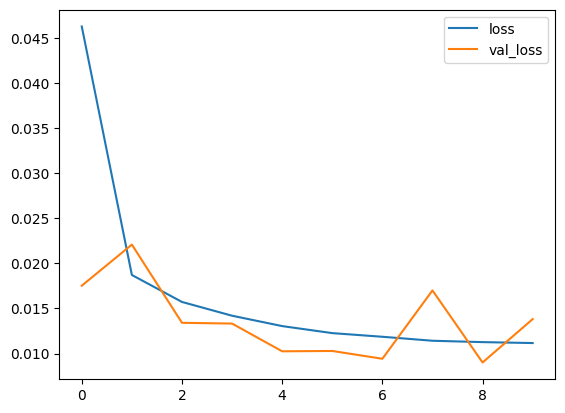

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
from tensorflow.keras.models import load_model
model.save("model.keras")

In [ ]:
import numpy as np

# pick out the first example
sample = x_test[0]              # shape: (18,)

# reshape to (1, 18)
sample_batch = np.expand_dims(sample, axis=0)

In [42]:
loaded_model = load_model("model.keras")
# now predict
pred = loaded_model.predict(sample_batch)
print(pred)                      # shape: (1, ...) – a single prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.9999951]]


In [43]:
print(y_train[0])

1


In [ ]:
sbn.countplot(x="label", data=df_train)

In [ ]:
df_train.sort_values("Time_cost", ascending=False).head(20)

In [ ]:
# Count unique values per column
print(df_train.nunique())

In [ ]:
df_train.corr(numeric_only=True)["label"].sort_values()